# **데이터 시각화**
 **기계시스템학부 2013075 박근영**

 다음 2020년도 건강검진정보 샘플(1만건) 데이터를 이용하여 시각화 과정, 즉 탐색적 데이터 분석(Explorator:y Data Analysis)을 수행하고 검진결과의 특징을 보여주시오. 


- matplotlib/seaborn/pandas 패키지를 이용하고, 필요하다면 엑셀 또는 파이썬 코드로 데이터 전처리 수행 
- 이용한 차트의 종류가 3가지 이상이어야 함 (산점도, 막대 그래프, 라인 그래프 등)
- 시각화 결과를 해석하고  3가지의 인사이트 도출하기 
- 코드는 github에 올리고 주소 제출



##**1) 데이터 파악하기**

- 패키지 사용하기 (pandas, seaborn, matplotlib)

In [2]:
%matplotlib inline
import pandas as pd                    # pandas
import matplotlib as mpl               # matplotlib 기본 설정
import matplotlib.pyplot as plt        # matplotlib 그래프 관련
import matplotlib.font_manager as fm   # matplotlib 폰트 관련
import seaborn as sns                  # seaborn 
mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 


-  폰트 설치하기

In [4]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                                # 전체 폰트 개수

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔 폰트 개수 (설치된 것을 확인)
#nanum_font

^C
sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/

In [5]:
# 폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 후 import 코드부터 다시 실행해야 함 

%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
fm._rebuild()  # 폰트 적용

NanumGothic Eco


In [6]:
 # 생략없이 모든 데이터의 열을 볼 수 있도록 설정한다.
pd.set_option('display.max_columns', None) 

# 2020년 건강검진정보 샘플을 불러온다
fpath = 'https://raw.githubusercontent.com/ykjoy/mining/main/health_data.csv'
df = pd.read_csv(fpath)

print(type(df))   # df의 자료형 출력
display(df)           # 변수 df에 저장되어 있는 데이터프레임 객체를 출력
                                 # iPython.display 를 이용하여 보기 좋게 출력
                    

<class 'pandas.core.frame.DataFrame'>


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,1,1,120.0,75.0,120.0,NaN,NaN,NaN,NaN,13.7,1.0,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,1,1,132.0,79.0,117.0,NaN,NaN,NaN,NaN,14.3,1.0,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,1,1,116.0,75.0,86.0,NaN,NaN,NaN,NaN,15.6,1.0,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,1,1,117.0,71.0,118.0,NaN,NaN,NaN,NaN,13.5,NaN,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


In [7]:
# 전체 행과 열의 개수
df.shape 

(10000, 31)

열 : 10000
행 : 31 (변수의 개수)

In [8]:
# 변수 속성을 확인한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [9]:
# 수치 데이터의 요약 통계량 출력 +  (문자 데이터의 특성인 빈도, 고유값 빈도, 최빈값, 최빈값 빈도)
df.describe(include ='all')  

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
count,10000.0,10000.00000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9912.000000,9912.000000,9912.000000,4044.000000,4044.000000,4044.000000,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,9998,9999,10000.000000,3251.000000,3251.000000,10000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,1
top,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,NaN,NaN,NaN,12/29/2021
freq,NaN,NaN,NaN,5138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6231,5819,NaN,NaN,NaN,10000
mean,2020.0,5000.50000,34.100100,NaN,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,1.045200,124.669693,76.789750,103.777542,198.269041,132.801434,56.158309,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,NaN,NaN,0.325100,0.175331,0.579514,NaN
std,0.0,2886.89568,12.394581,NaN,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,0.218545,14.629865,9.931527,24.649816,41.945872,92.919969,14.484780,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,NaN,NaN,0.468436,0.380308,0.591269,NaN
min,2020.0,1.00000,11.000000,NaN,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,77.000000,40.000000,55.000000,70.000000,14.000000,19.000000,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,2020.0,2500.75000,27.000000,NaN,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,70.000000,91.000000,169.000000,77.000000,46.000000,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
50%,2020.0,5000.50000,41.000000,NaN,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,77.000000,99.000000,197.000000,111.000000,54.000000,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN
75%,2020.0,7500.25000,44.000000,NaN,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,1.000000,134.000000,83.000000,109.000000,225.000000,160.000000,65.000000,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,NaN,NaN,1.000000,0.000000,1.000000,NaN


#**파악한 데이터를 기반으로 유의미한 변수 추출**
##**1. 유의미한 변수**
- **가입자의 기본 정보** 

  가입자일련 번호, 시도코드, 성별 코드, 연령대코드, 신장, 체중, 허리둘레
- **혈압** 

  : 수축기혈압, 이완기혈압, 식전혈당, 총콜레스트롤, 트리글리세라이드
- **지방**

  :  HDL 콜레스트롤, LDL 콜레스트롤
- **혈액 및 신장질환**

  : 혈색소, 요단백, 혈청크레아닌

  (요단백이 양성인 경우, 신장 질환을 의심해야 한다.)
- **간기능** 

  :  AST, ALT, 감마지티피
- **기타** 

  : 흡연상태, 음주여부, 구강검진 수검여부

## **2. 무의미한 변수**
- 기준년도, 시력(좌,우), 청력(좌,우),데이터 공개 일자
- 치아우식증 유무, 치석

> **무의미한 변수로 선정한 경우**\
> 1) 위의 표에서 특정한 통계값이 모두 일정한 경우\
> 2) 변수 자체가 분석의 의미가 없는 경우
> 3) 데이터의 양이 너무 적은 경우 



음주 여부, 흡연 상태 <-> 간 기능 관련 항목

허리둘레 (뱃살) <-> 지방 관련 항목(지방 관련 데이터) <-> 혈청 크레아티닌 (근육)

질환 관련 수치는 모두 성별 코드, 연령대코드별로 분석해본다.

```
# 코드로 형식 지정됨
```




##**2) 데이터 조작하기**

In [10]:
df_new = df.copy()    # 복사본 만들기, df_new = df 를 사용하는 경우 이름만 다를 뿐 어느 한 쪽을 수정하면 다른 한 쪽도 같이 수정됨    
# 무의미한 변수 삭제
df_new.drop(columns='기준년도', inplace=True)
df_new.drop(columns='시력(좌)', inplace=True)
df_new.drop(columns='시력(우)', inplace=True)
df_new.drop(columns='청력(좌)', inplace=True)
df_new.drop(columns='청력(우)', inplace=True)
df_new.drop(columns='데이터공개일자', inplace=True)

display(df_new)

,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,1,36,M,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN
1,2,27,F,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN
2,3,11,F,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN
3,4,31,M,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0
4,5,41,F,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,44,F,13,155,55,83.0,120.0,75.0,120.0,NaN,NaN,NaN,NaN,13.7,1.0,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN
9996,9997,43,F,11,160,55,77.5,132.0,79.0,117.0,NaN,NaN,NaN,NaN,14.3,1.0,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0
9997,9998,45,M,12,160,80,93.0,116.0,75.0,86.0,NaN,NaN,NaN,NaN,15.6,1.0,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN
9998,9999,27,F,15,155,55,78.0,117.0,71.0,118.0,NaN,NaN,NaN,NaN,13.5,NaN,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN


In [11]:
display(df_new[['흡연상태','음주여부','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']])   # 여러 변수 추출 

,흡연상태,음주여부,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,No,No,21.0,27.0,21.0
1,No,No,18.0,15.0,15.0
2,No,No,27.0,25.0,7.0
3,No,No,65.0,97.0,72.0
4,No,No,18.0,17.0,14.0
...,...,...,...,...,...
9995,No,Yes,20.0,21.0,20.0
9996,No,Yes,24.0,22.0,21.0
9997,No,No,22.0,27.0,35.0
9998,No,No,26.0,24.0,21.0


##**3) 데이터 시각화하기**

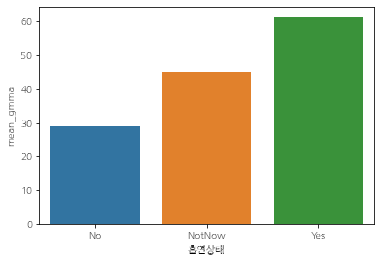

In [100]:
men = df_new[df_new.성별코드 == 'M']
women = df_new[df_new.성별코드 == 'F']
df_sex_mean = df_new.groupby('흡연상태' , as_index = False).agg( mean_gmma = ('감마지티피', 'mean'))

sns.barplot(data = df_sex_mean, x = '흡연상태', y = 'mean_gmma')


1. 감마지티피는 간 기능을 나타내는 혈액검사상의 수치이다. 흡연 경험에 따라, 감마지티피의 수치는 증가할 확률이 높다는 것을 알 수 있다. 흡연을 하지 않는 사람과 흡연을 과거에는 했지만, 지금 하지 않는 사람과의 감마지티피의 지수 차이도 결코 작다고 할 수 없다. 그러므로, 흡연이 간에 미치는 영향을 가시적으로 볼 수 있는 표이다.

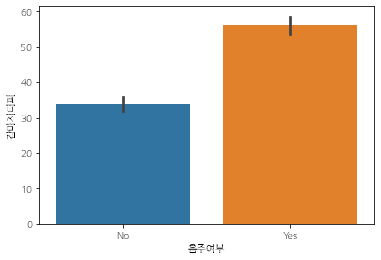

In [83]:
sns.barplot(data = men, x = '음주여부', y = '감마지티피')


1-1. 음주 또한, 간에 굉장히 안 좋다는 것이 가시적으로 나타난다. 음주를 하지 않는 경우보다 하는 경우가 1

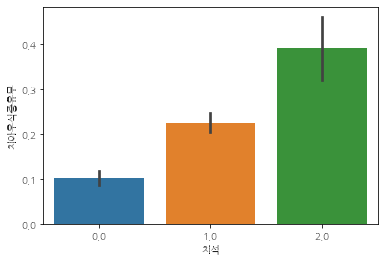

In [103]:
sns.barplot(data = df
                , x = '치석', y = '치아우식증유무')


2. 치아 우식증이 있으면 치석이 있을 확률이 높다. 치아 우식증은 흔히 충치라고 불리우는 질병이다. 치석이 없는 경우와 있는 경우가 거의 2배차이 나는 것을 알 수 있다. 
  -> 치석과 치아우식증의 상관관계

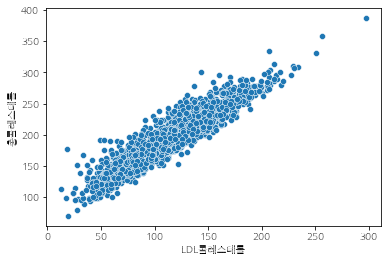

In [58]:
sns.scatterplot(data = men
                , x = 'LDL콜레스테롤', y = '총콜레스테롤')

3. LDL 콜레스테롤이 증가할 수록 총 콜레스테롤도 증가한다.

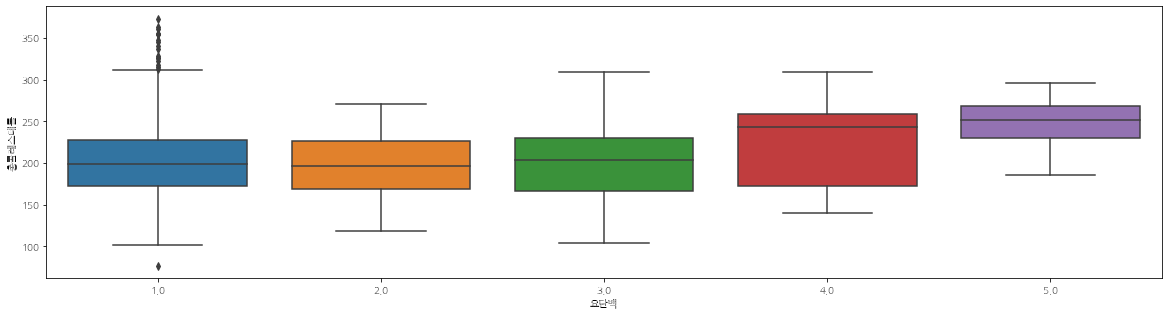

In [128]:
plt.figure(figsize=(20, 5))
sns.boxplot(data = women, x = '요단백', y = '총콜레스테롤')


4. 여성 중에서 요단백 수치가 낮을 수록, 총콜레스테롤이 정상범위에서 넘어가는 사람이 많아진다. 총콜레스테롤의 정상범위는 150~250mg/dL이며, 요단백이 5.0에 달하는 경우는 모두 정상 범위보다 살짝 높게 나타난다.
